In [17]:
# Loaded variable 'df' from URI: d:\ADRIAN\IBM\clean_df.csv
import pandas as pd
df = pd.read_csv('clean_car_prices.csv')

In [18]:
# Display basic info
print("\n🔍 Dataset Info:")
print(df.info())

# Show first few rows
print("\n📝 Sample Data:")
print(df.head())

# Show all column names
print("\n📌 Column Names:", df.columns)



🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   num_of_doors       201 non-null    object 
 4   body_style         201 non-null    object 
 5   drive_wheels       201 non-null    object 
 6   engine_location    201 non-null    object 
 7   wheel_base         201 non-null    float64
 8   length             201 non-null    float64
 9   width              201 non-null    float64
 10  height             201 non-null    float64
 11  curb_weight        201 non-null    int64  
 12  engine_type        201 non-null    object 
 13  num_of_cylinders   201 non-null    object 
 14  engine_size        201 non-null    int64  
 15  fuel_system        201 non-null    object 
 16  bore     

Note: you may need to restart the kernel to use updated packages.

🚨 Missing Values:
 Series([], dtype: int64)

🔍 Correlation with Price:
 price                1.000000
engine_size          0.872335
curb_weight          0.834415
horsepower           0.809607
highway_l/100km      0.801118
city_l/100km         0.789898
width                0.751265
length               0.690628
wheel_base           0.584642
bore                 0.543155
height               0.135486
normalized_losses    0.133999
stroke               0.082209
compression_ratio    0.071107
symboling           -0.082391
peak_rpm            -0.102310
city_mpg            -0.686571
highway_mpg         -0.704692
Name: price, dtype: float64


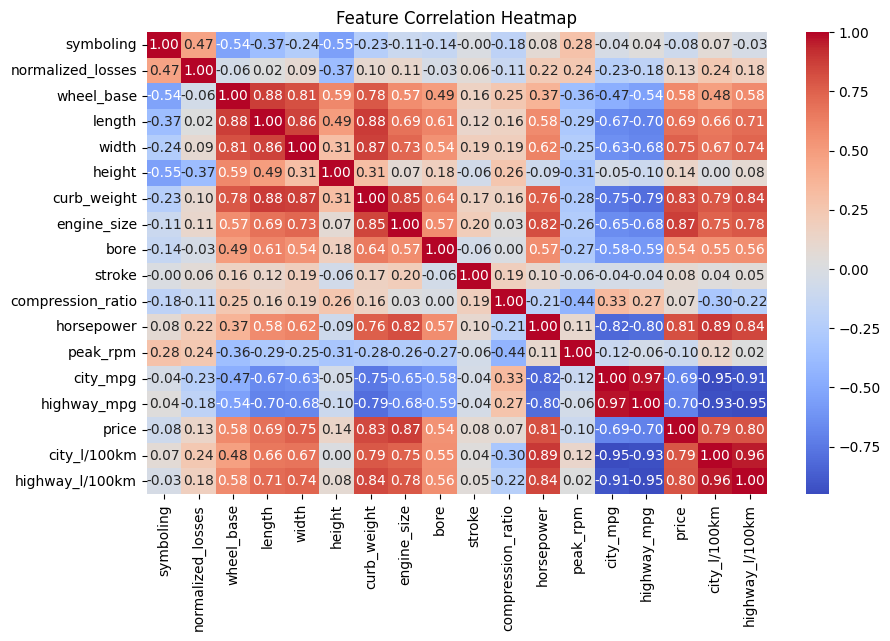

In [19]:
%pip install seaborn -q
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_values = df.isnull().sum()
print("\n🚨 Missing Values:\n", missing_values[missing_values > 0])

# Compute correlation matrix
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Display correlation with price
correlation_with_price = corr_matrix["price"].sort_values(ascending=False)
print("\n🔍 Correlation with Price:\n", correlation_with_price)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [20]:
# Fix missing values
df["stroke"].fillna(df["stroke"].median(), inplace=True)
df["peak_rpm"].fillna(df["peak_rpm"].median(), inplace=True)

# Rename columns for consistency
df.rename(columns={"city-L/100km": "city_L_100km", "highway-L/100km": "highway_L_100km"}, inplace=True)

# One-hot encode fuel type (if needed)
if "fuel_type" in df.columns:
    df = pd.get_dummies(df, columns=["fuel_type"], drop_first=False)

print("✅ Missing values fixed and fuel type encoded!")


✅ Missing values fixed and fuel type encoded!


/tmp/ipykernel_10308/415201491.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["stroke"].fillna(df["stroke"].median(), inplace=True)
/tmp/ipykernel_10308/415201491.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [21]:
# First rename the columns with slashes to have consistent naming
df.rename(columns={"city_l/100km": "city_L_100km", "highway_l/100km": "highway_L_100km"}, inplace=True)

selected_features = [
    "curb_weight", "engine_size", "horsepower", "highway_L_100km", "city_L_100km",
    "width", "length", "fuel_type_diesel", "fuel_type_gas"
]

# Rename any remaining columns by replacing hyphens with underscores for consistency
df.columns = df.columns.str.replace('-', '_')

# Keep only relevant features
df = df[selected_features + ["price"]]

print("✅ Feature selection successful! Selected features:", df.columns)


✅ Feature selection successful! Selected features: Index(['curb_weight', 'engine_size', 'horsepower', 'highway_L_100km',
       'city_L_100km', 'width', 'length', 'fuel_type_diesel', 'fuel_type_gas',
       'price'],
      dtype='object')


In [22]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# Identify numerical features
num_features = ["curb_weight", "engine_size", "horsepower", "highway_L_100km", "city_L_100km", "width", "length"]

# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", RobustScaler(), num_features)  # Scale numerical features
])

print("✅ Preprocessing pipeline created!")


✅ Preprocessing pipeline created!


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# Define features & target
X = df.drop(columns=["price"])  # Features
y = df["price"]  # Target

# Split dataset into 80% training & 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data split completed: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples.")

# Define model pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Train model
model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Data split completed: 160 training samples, 41 test samples.
✅ Model trained successfully!


In [24]:
# Check model accuracy on training & test sets
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"📊 Training Score: {train_score:.4f}")
print(f"📊 Test Score: {test_score:.4f}")


📊 Training Score: 0.9917
📊 Test Score: 0.9370


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=200,   # Increase trees (learns better)
        learning_rate=0.05, # Reduce step size (avoids overfitting)
        max_depth=4,        # Limit tree depth (prevents memorization)
        random_state=42
    ))
])



🔍 Feature Importance:
            Feature  Importance
0      curb_weight    0.542700
1      engine_size    0.276381
2       horsepower    0.054316
5            width    0.050085
4     city_L_100km    0.032239
6           length    0.030970
3  highway_L_100km    0.013309


/tmp/ipykernel_10308/196069274.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="Blues_r")


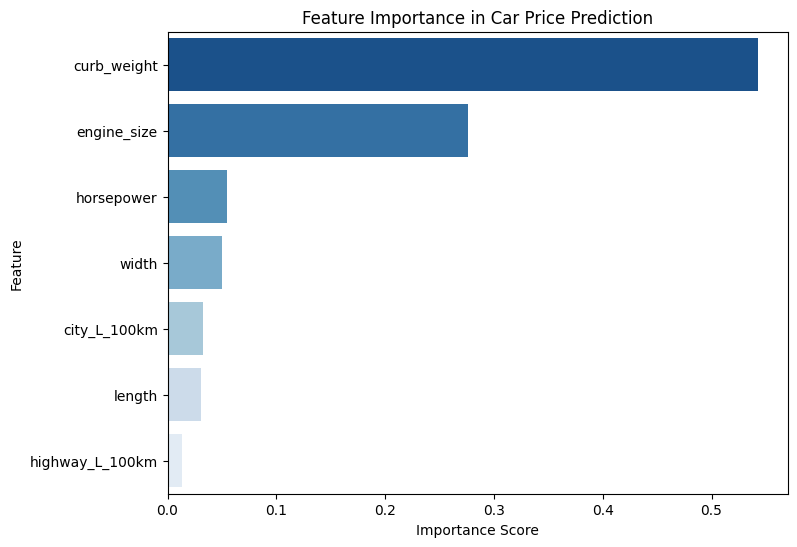

In [26]:
# Train the model with our hyperparameters before extracting feature importance
model.fit(X_train, y_train)
importances = model.named_steps["regressor"].feature_importances_

# Convert to DataFrame - using num_features which matches the length of importances
feature_importance_df = pd.DataFrame({"Feature": num_features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Print the most important features
print("\n🔍 Feature Importance:\n", feature_importance_df)

# Plot feature importance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="Blues_r")
plt.title("Feature Importance in Car Price Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [27]:
selected_features = [
    "curb_weight", "engine_size", "horsepower", "width"
]

# Keep only relevant features
df = df[selected_features + ["price"]]


In [28]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# Identify numerical features
num_features = selected_features

# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", RobustScaler(), num_features)  # Scale numerical features
])

print("✅ Preprocessing pipeline updated!")


✅ Preprocessing pipeline updated!


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# Define features & target
X = df.drop(columns=["price"])  # Features
y = df["price"]  # Target

# Split dataset into 80% training & 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data split: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples.")

# Define model pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42))
])

# Train model
model.fit(X_train, y_train)

print("✅ Model retrained successfully!")


✅ Data split: 160 training samples, 41 test samples.
✅ Model retrained successfully!


In [30]:
# Check model accuracy on training & test sets
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"📊 New Training Score: {train_score:.4f}")
print(f"📊 New Test Score: {test_score:.4f}")


📊 New Training Score: 0.9961
📊 New Test Score: 0.9421


In [31]:
import joblib
import os

# Create models directory if it doesn't exist
if not os.path.exists("models"):
	os.makedirs("models")

# Save trained model
joblib.dump(model, "models/car_price_model.pkl")

print("✅ Model saved successfully!")


✅ Model saved successfully!
